Load the data
--

In [ ]:
class_0['nameOrig'].isin(class_1['nameOrig']).sum()

28

In [60]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv(r"C:\Users\marle\Files\programowanie\Fraud-Detection\financial_data.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('step', axis=1, inplace=True)

<Axes: xlabel='isFraud', ylabel='count'>

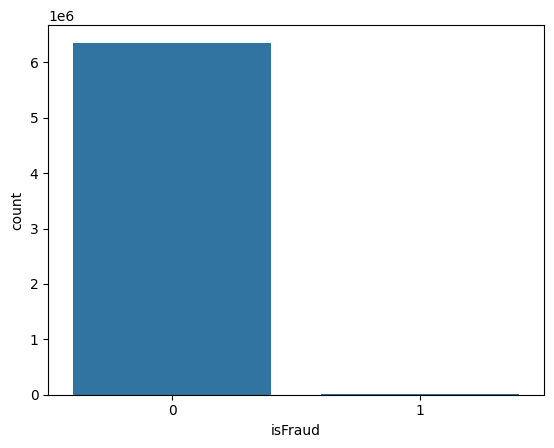

In [50]:
sns.countplot(df, x='isFraud')

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Separate classes
--

In [63]:
class_1 = df[df['isFraud']==1]
class_0 = df[df['isFraud']==0]

In [64]:
print("class 0:", class_0.shape)
print("class 1:", class_1.shape)

class 0: (6354407, 10)
class 1: (8213, 10)


Random Under-Sampling
--

In [17]:
class_0_us = class_0.sample(len(class_1))

In [19]:
df_us = pd.concat([class_0_us, class_1], ignore_index=True)

In [20]:
df_us

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,2315.75,C213292030,7012971.98,7015287.73,C762089999,2343957.50,2341641.76,0,0
1,CASH_IN,1878.94,C450378417,5170975.97,5172854.91,C884787922,375352.20,373473.26,0,0
2,CASH_OUT,147739.63,C360721840,0.00,0.00,C1798895116,6205298.51,6353038.15,0,0
3,CASH_OUT,77307.04,C324769774,0.00,0.00,C692997099,295698.58,373005.62,0,0
4,CASH_IN,130348.24,C2097315297,3407399.26,3537747.50,C345092591,3261432.11,3051187.26,0,0
...,...,...,...,...,...,...,...,...,...,...
16421,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
16422,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
16423,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
16424,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [48]:
px.bar(df_us.groupby('isFraud').size().reset_index(name="counts") , x='isFraud', y='counts')

In [23]:
px.scatter(df_us, x='oldbalanceOrg', y='newbalanceOrig', color='isFraud')

In [32]:
px.histogram(df_us, x='type', color='isFraud')

Random Under-Sampling With Imblearn
--